$$
u(x) - \int\limits_{0}^{1} \dfrac{xs}{\sqrt{1+0.1 xs}} u(s) ds = 1 + x
$$

$$
k(x, s) = xs + \dfrac{1}{20}x^2 s^2
$$

In [19]:
import numpy as np
from scipy.integrate import quad

In [20]:
def alpha1(x): return x
def alpha2(x): return -0.05 * x**2
def beta1(s): return s
def beta2(s): return s**2
def f(x): return 1 + x

In [21]:
b1, _ = quad(lambda s: beta1(s)*f(s), 0, 1)
b2, _ = quad(lambda s: beta2(s)*f(s), 0, 1)

a11, _ = quad(lambda s: beta1(s)*alpha1(s), 0, 1)
a12, _ = quad(lambda s: beta1(s)*alpha2(s), 0, 1)
a21, _ = quad(lambda s: beta2(s)*alpha1(s), 0, 1)
a22, _ = quad(lambda s: beta2(s)*alpha2(s), 0, 1)

In [22]:
A = np.array([[a11, a12], [a21, a22]])
B = np.array([b1, b2])

In [23]:
I = np.eye(2)
c = np.linalg.solve(I - A, B)

In [24]:
def u(x):
    return f(x) + c[0]*alpha1(x) + c[1]*alpha2(x)

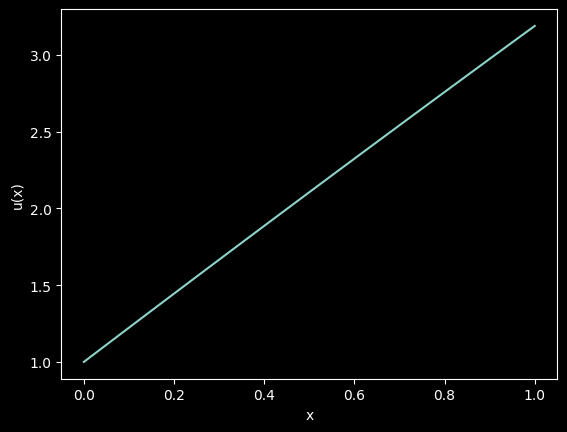

In [25]:
import matplotlib.pyplot as plt

x_vals = np.linspace(0, 1, 100)
u_vals = [u(x) for x in x_vals]

plt.plot(x_vals, u_vals)

plt.xlabel('x')
plt.ylabel('u(x)')

plt.show()

In [34]:
def integral_term(x):
    integrand = lambda s: K(x, s) * u(s)
    result, _ = quad(integrand, 0, 1)
    return result

def residual(x):
    return u(x) - integral_term(x) - f(x)

x_points = np.linspace(0, 1, 20)
residuals = [residual(x) for x in x_points]

mse = np.sqrt(np.max(np.array(residuals)**2))
print(f"Среднеквадратичная невязка: {mse:.2e}")

Среднеквадратичная невязка: 2.42e-03
